# Working with missing values in numpy arrays 

## What is np.nan?

Numpy developers have defined a specific value to indicate that values are not a regular number (_int_, _float_). Many functions in the numpy package can recognize the _np.nan_ value and ignore those values. The plot functions in package Matplotlib.pyplot are not all designed to work with _np.nan_ values, though.


## What is the purpose of this notebook? 

This notebook shows you an example how we can extract from an array all the values with real numbers and omit the _np.nan_ values. We do this with the help of loops and objects of type _list_. 

The example works with simulated time series data of a decaying oscillation. 
We manipulate the data array and insert several a _np.nan_ values into the numpy array _y_.
(Imagine a failure in the sensors during the experiment that caused missing values in the time series.)


Our initial attempt of creating a boxplot with the data in array _y_
does not work and causes an error, because of the _np.nan_ values that are in the array.

(see code cell below)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x= np.arange(1,101,1) # time steps (in seconds, for example)
y= np.exp(-1.*x/50) # amplitude modulation
z= y*np.sin(np.pi*x/10) # a decaying pendulum motion
# insert np.nan values into the array 
z[30:41]=np.nan

### Testing Matplotlib's plot function how it deals with missing values

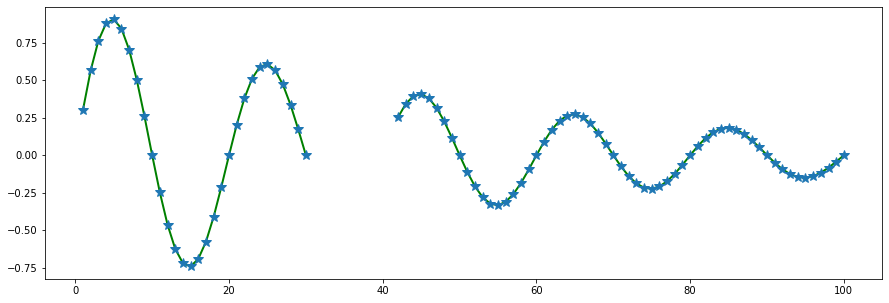

In [3]:
plt.figure(figsize=(15,5))
plt.plot(x,z,linewidth=2,color='green')
plt.plot(x,z,'*',markersize=10,)
plt.show() # plt.plot works fine with np.nan values in the array

### Introducing plt.boxplot and checking if the function works with np.nan values

Uncomment the line below see if the function works with data array in variable z
(you will see an empty plot).


## One solution:  Copy the good values from array z into a new list zclean 

### How to check if a value in the array is np.nan? 

For this purpose, numpy developers provide the function, _np.isnan()_
You can put in a variable and check if the value is np.nan.


In [4]:
test=10.
test2=np.nan
print ( np.isnan(test) )

print ( np.isnan(test2) )


False
True


### Now we use the function _np.isnan()_  in connection with the if-statement (line 5 in the code below).


In [5]:
# in order to eliminate the np.nan
# we can do this
zclean=[]
for value in z:
    if np.isnan(value):
        pass
    else:
        zclean.append(value)

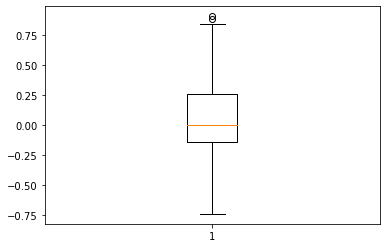

In [6]:
#Now the box-plot works
bx=plt.boxplot(zclean)

## In the solultion below we added that we copy the corresponding x-values to a new list xclean.


Often we have paired data like in this time series example. Array *x* contains only valid numerical values (no np.nan values). If you want to keep the x and y values paired, then you have to subsample the array *x* at the right index positions, too. That is done in the example below. We added another list *xclean* and use an index position counter *i* in the loop.


In [7]:
zclean=[]
xclean=[]
i=0
for value in z:
    if np.isnan(value):
        pass
    else:
        zclean.append(value)
        xvalue=x[i]
        xclean.append(xvalue)
        #print("the value is %6.4f" % (value))
    i=i+1


### Now the still boxplot works (of course)

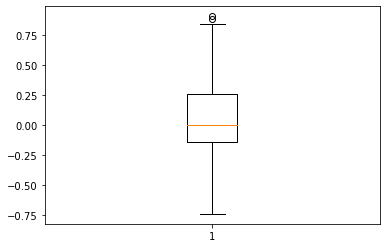

In [8]:
bx=plt.boxplot(zclean)

### And you can still plot the same time series as before:

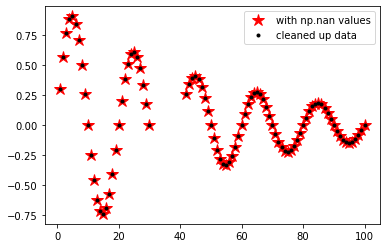

In [9]:

plt.plot(x,z,'*',color='red',markersize=12,label='with np.nan values')
plt.plot(xclean,zclean,'.',color='black',label='cleaned up data')

plt.legend()
plt.show()


### Note: 
(a) Removing np.nan values from arrays can affect your line plot appearance:
See what happens when you plot the cleaned up data (removed the nan.values).

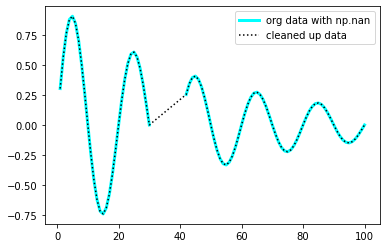

In [10]:
plt.plot(x,z,color='cyan',linewidth=3,label='org data with np.nan')
plt.plot(xclean,zclean,':',color='black',label='cleaned up data')
plt.legend()
plt.show()

(b) We use lists because they are convenient to build and append values to them. You can always convert them into type numpy array 
before working with them in the data analysis and plotting.

In [11]:
zclean=np.array(zclean)
xclean=np.array(xclean)
# this allows us to do math with the numpy arrays
zclean=zclean*100 


### Summary:

Real-world data are hardly ever perfect. Missing values can be indicated in numpy arrays with np.nan.
Oftentimes we need to clean up the data arrays before we can conduct our data analysis. We have ways to check for np.nan values. Lists and for-loops allow us to collect the good data values in lists or arrays. This notebook provides a fairly simply but widely applicable 'recipe' code for cleaning 1-dimensional arrays from np.nan values.
